<a href="https://colab.research.google.com/github/WSzymczak23/projekty-SDA/blob/main/Regresja_wielu_zmiennych%2C_wielomianowa_oraz_drzewa_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("portland_housing.csv")

In [ ]:
X = df[['Size', 'Bedrooms']]
y = df['Price']

In [ ]:
X

,Size,Bedrooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4
5,1985,4
6,1534,3
7,1427,3
8,1380,3
9,1494,3


In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.intercept_ #theta_0

89597.90954279754

In [ ]:
model.coef_

array([  139.21067402, -8738.01911233])

In [ ]:
predict_data = np.array([[3200, 3], [3720, 2]])

In [ ]:
model.predict(predict_data)

array([508858.00906222, 589985.57866371])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df[['Size']]
y = df['Price']

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [ ]:
X.values[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]])

In [ ]:
X_poly[:5]

array([[1.00000000e+00, 2.10400000e+03, 4.42681600e+06, 9.31402086e+09],
       [1.00000000e+00, 1.60000000e+03, 2.56000000e+06, 4.09600000e+09],
       [1.00000000e+00, 2.40000000e+03, 5.76000000e+06, 1.38240000e+10],
       [1.00000000e+00, 1.41600000e+03, 2.00505600e+06, 2.83915930e+09],
       [1.00000000e+00, 3.00000000e+03, 9.00000000e+06, 2.70000000e+10]])

In [ ]:
predict_data = [[3200], [3720]]

predict_data_poly = poly.transform(predict_data)

In [ ]:
predict_data_poly

array([[1.0000000e+00, 3.2000000e+03, 1.0240000e+07, 3.2768000e+10],
       [1.0000000e+00, 3.7200000e+03, 1.3838400e+07, 5.1478848e+10]])

In [ ]:
model.fit(X_poly, y)

model.predict(predict_data_poly)

array([525477.86332531, 592737.54295217])

In [ ]:
#### drzewa decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = df[['Size', 'Bedrooms']]
y = df['Price']

In [ ]:
model = DecisionTreeRegressor(max_depth=3, min_samples_split=7)
model.fit(X,y)

predict_data = np.array([[3200, 3], [3720, 2]])
model.predict(predict_data)

array([590266.66666667, 590266.66666667])

In [ ]:
from sklearn import tree

In [ ]:
text_representation = tree.export_text(model)

In [ ]:
#print(text_representation)

In [ ]:
import matplotlib.pyplot as plt

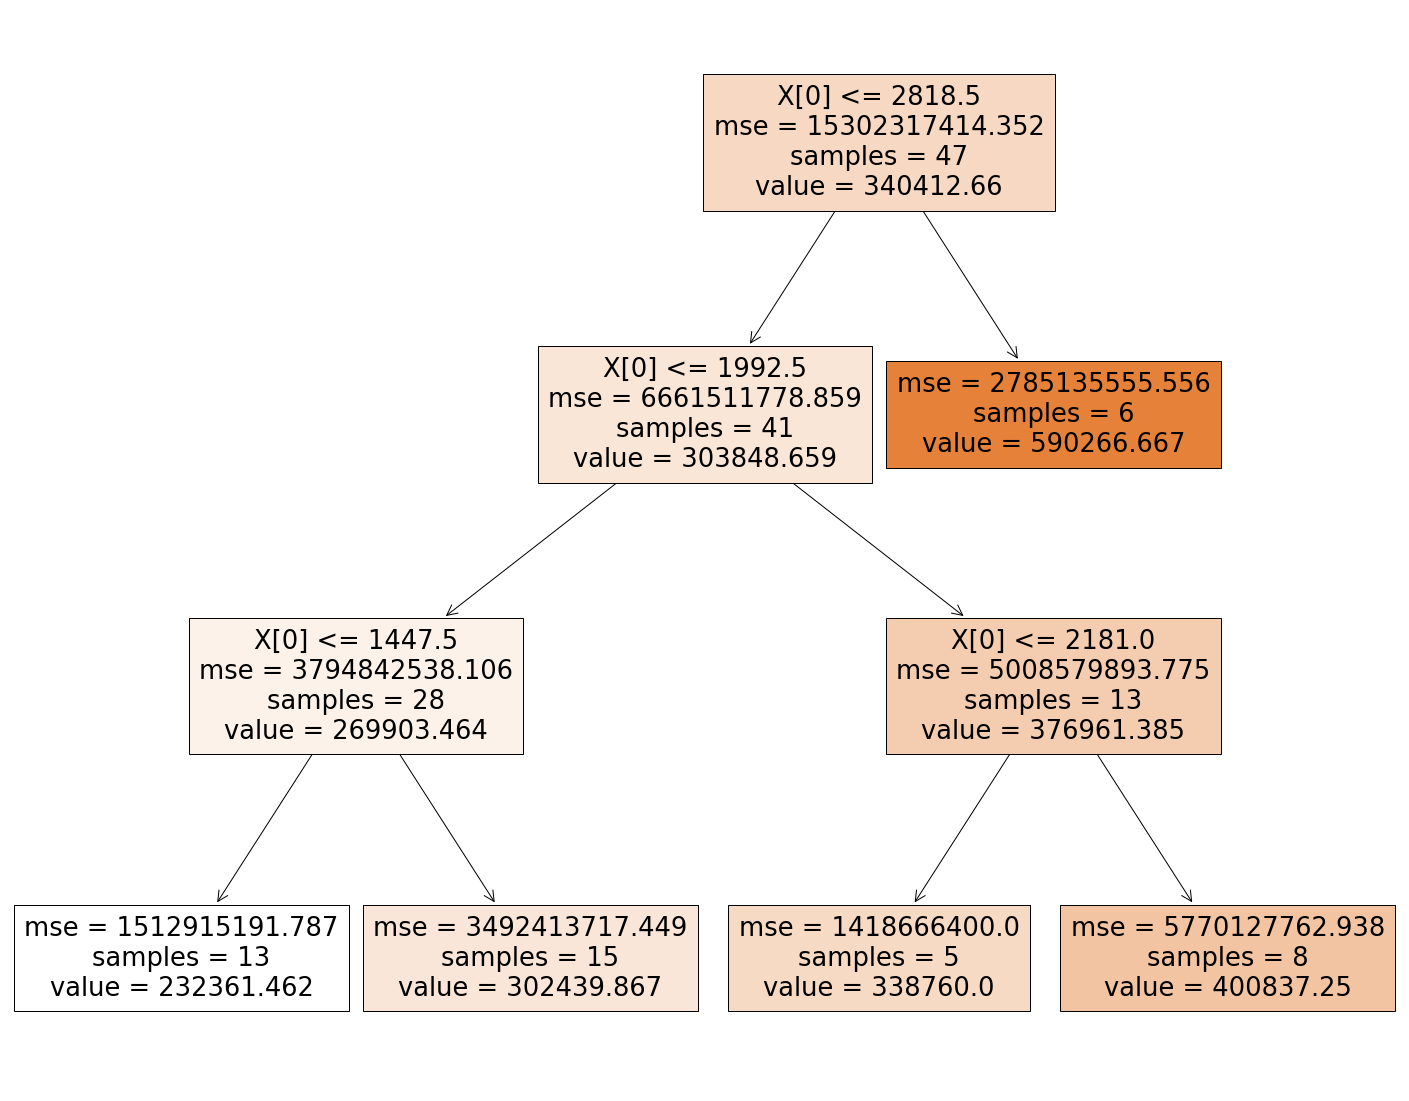

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True, class_names="example")
fig.savefig("decision_tree.png")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = \
 train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(27, 2) (27,)
(10, 2) (10,)
(10, 2) (10,)


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
cv = KFold(n_splits=6, shuffle=True)
my_split = cv.split(X, y)

my_split

<generator object _BaseKFold.split at 0x7fda672a6f10>

In [ ]:
for train, test in my_split:
  X_train, y_train = X.iloc[train], y.iloc[train]
  X_test, y_test = X.iloc[test], y.iloc[test]
  print(X_train.shape, X_test.shape)

In [ ]:
from sklearn.model_selection import LeaveOneOut


In [ ]:
cv = LeaveOneOut()

my_split = cv.split(X, y)

for train, test in my_split:
  X_train, y_train = X.iloc[train], y.iloc[train]
  X_test, y_test = X.iloc[test], y.iloc[test]
  print(X_train.shape, X_test.shape)

(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
(46, 2) (1, 2)
